In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop

Using TensorFlow backend.


# 데이터 불러오기

In [2]:
dataset = pd.read_csv("../data/PN_dataset/dataset_1600.csv")
dataset = dataset[["review", "PN"]]
dataset.head()

,review,PN
0,So people just go nuts for this place and I'm ...,0
1,Always part of our itinerary whenever in KR. t...,1
2,Very disappointed. Went there on a Saturday ni...,0
3,I just had a horrible experience at Genghis Gr...,0
4,Absolutely great place for a good pint and a r...,1


In [3]:
review = dataset["review"].tolist()
sentiment = dataset["PN"].tolist()
sentiment = [int(sent) for sent in sentiment]

# 긍정 & 부정 리뷰 비율 맞추기

In [5]:
balanced_texts = []
balanced_labels = []
count = 1600
neg_pos = [0,0]
for i in range(len(review)):
    PN = sentiment[i]
    if neg_pos[PN] < count:
        balanced_texts.append(review[i])
        balanced_labels.append(sentiment[i])
        neg_pos[PN] += 1

# 토크나이저

In [6]:
maxlen = 200 
max_words = 10000  
training_samples = 1280
test_samples = 320

In [7]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(balanced_texts)
sequences = tokenizer.texts_to_sequences(balanced_texts)
print(len(sequences[1]))
print(len(sequences[2]))

data_input = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(balanced_labels)

18
57


# train and test split

In [10]:
indices = np.arange(data_input.shape[0])
np.random.shuffle(indices)
data_input = data_input[indices]
labels = labels[indices]

# train on 1280，test on 320
X_train = data_input[:training_samples]
y_train = labels[:training_samples]
X_test = data_input[training_samples: training_samples + test_samples]
y_test = labels[training_samples: training_samples + test_samples]
print(" X_train",X_train.shape)
print(" y_train",y_train.shape)

 X_train (1280, 200)
 y_train (1280,)


# Model1 - Using Embedding layer and LSTM

In [11]:
max_words = 10000 
maxlen = 200
model = Sequential()
model.add(Embedding(max_words, 64,input_length = maxlen))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 673,089
Trainable params: 673,089
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

C:\Users\admin\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1024 samples, validate on 256 samples
Epoch 1/5
1024/1024 [==============================] - 2s 2ms/step - loss: 0.6866 - acc: 0.5967 - val_loss: 0.6399 - val_acc: 0.6172
Epoch 2/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6334 - acc: 0.6729 - val_loss: 0.5451 - val_acc: 0.7734
Epoch 3/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.5008 - acc: 0.8047 - val_loss: 0.4833 - val_acc: 0.8125
Epoch 4/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.4310 - acc: 0.8584 - val_loss: 0.4578 - val_acc: 0.8203
Epoch 5/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.3597 - acc: 0.9053 - val_loss: 0.3931 - val_acc: 0.8359


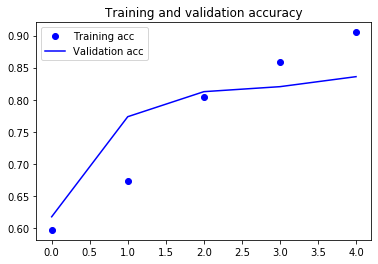

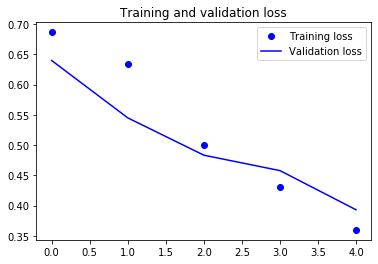

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model.evaluate(x_test, y_test)

320/320 [==============================] - 0s 499us/step


[0.9836161077022553, 0.49687498807907104]

In [15]:
max_words = 10000 
maxlen = 200
model = Sequential()
model.add(Embedding(max_words, 64,input_length = maxlen))
model.add(LSTM(64,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [16]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

C:\Users\admin\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1024 samples, validate on 256 samples
Epoch 1/10
1024/1024 [==============================] - 2s 2ms/step - loss: 0.6808 - acc: 0.5908 - val_loss: 0.7074 - val_acc: 0.5781
Epoch 2/10
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6234 - acc: 0.6816 - val_loss: 0.5583 - val_acc: 0.7539
Epoch 3/10
1024/1024 [==============================] - 1s 1ms/step - loss: 0.4827 - acc: 0.8379 - val_loss: 0.4283 - val_acc: 0.8320
Epoch 4/10
1024/1024 [==============================] - 1s 1ms/step - loss: 0.3909 - acc: 0.8867 - val_loss: 0.3746 - val_acc: 0.8594
Epoch 5/10
1024/1024 [==============================] - 1s 1ms/step - loss: 0.3131 - acc: 0.9111 - val_loss: 0.3309 - val_acc: 0.8750
Epoch 6/10
1024/1024 [==============================] - 1s 1ms/step - loss: 0.2405 - acc: 0.9365 - val_loss: 0.3526 - val_acc: 0.8477
Epoch 7/10
1024/1024 [==============================] - 1s 1ms/step - loss: 0.2051 - acc: 0.9355 - val_loss: 0.3546 - val_acc: 0.8438
Epoch 8/10
1024

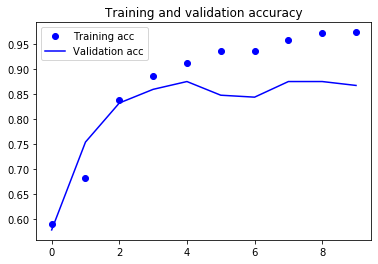

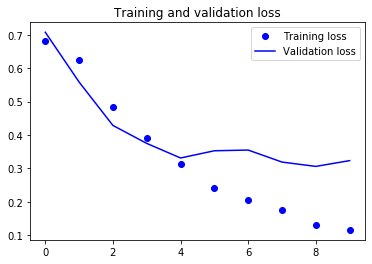

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
model.evaluate(x_test, y_test)

320/320 [==============================] - 0s 524us/step


[1.6624977469444275, 0.48750001192092896]

# Model 2 - Using combination of CNN and RNN

In [27]:
model_conv = Sequential()
model_conv.add(Embedding(max_words, 128, input_length=maxlen))
model_conv.add(Dropout(0.2))
model_conv.add(Conv1D(64, 5, activation='relu'))
model_conv.add(MaxPooling1D(pool_size=3))
model_conv.add(LSTM(128))
model_conv.add(Dense(1, activation='sigmoid'))
model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model_conv.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 196, 64)           41024     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 65, 64)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,419,969
Trainable params: 1,419,969
Non-trainable params: 0
____________________________________________

In [28]:
history = model_conv.fit(X_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

C:\Users\admin\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1024 samples, validate on 256 samples
Epoch 1/5
1024/1024 [==============================] - 2s 2ms/step - loss: 0.6887 - acc: 0.5361 - val_loss: 0.6773 - val_acc: 0.6289
Epoch 2/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.6258 - acc: 0.6621 - val_loss: 0.6454 - val_acc: 0.6094
Epoch 3/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.5346 - acc: 0.7314 - val_loss: 0.5230 - val_acc: 0.7773
Epoch 4/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.3575 - acc: 0.8545 - val_loss: 0.3816 - val_acc: 0.8438
Epoch 5/5
1024/1024 [==============================] - 1s 1ms/step - loss: 0.1813 - acc: 0.9443 - val_loss: 0.4046 - val_acc: 0.8164


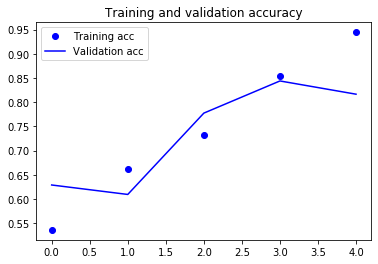

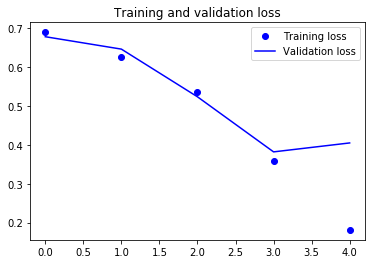

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [30]:
model_conv.evaluate(x_test, y_test)

320/320 [==============================] - 0s 389us/step


[1.9060985803604127, 0.5]

# Using bidrectional RNNs

In [32]:
from keras import backend as K
K.clear_session()

In [33]:
model = Sequential()
model.add(Embedding(max_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 1,543,425
Trainable params: 1,543,425
Non-trainable params: 0
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Users\admin\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1024 samples, validate on 256 samples
Epoch 1/10
1024/1024 [==============================] - 7s 7ms/step - loss: 0.6840 - acc: 0.5264 - val_loss: 0.6353 - val_acc: 0.7070
Epoch 2/10
1024/1024 [==============================] - 7s 7ms/step - loss: 0.6292 - acc: 0.7188 - val_loss: 0.4974 - val_acc: 0.7852
Epoch 3/10
1024/1024 [==============================] - 7s 7ms/step - loss: 0.3866 - acc: 0.8721 - val_loss: 0.3919 - val_acc: 0.8555
Epoch 4/10
1024/1024 [==============================] - 7s 7ms/step - loss: 0.3701 - acc: 0.8848 - val_loss: 0.5088 - val_acc: 0.7891
Epoch 5/10
1024/1024 [==============================] - 7s 7ms/step - loss: 0.2810 - acc: 0.9326 - val_loss: 0.3228 - val_acc: 0.8672
Epoch 6/10
1024/1024 [==============================] - 7s 7ms/step - loss: 0.1634 - acc: 0.9541 - val_loss: 0.3476 - val_acc: 0.8398
Epoch 7/10
1024/1024 [==============================] - 7s 7ms/step - loss: 0.2142 - acc: 0.9336 - val_loss: 0.3217 - val_acc: 0.8555
Epoch 8/10
1024

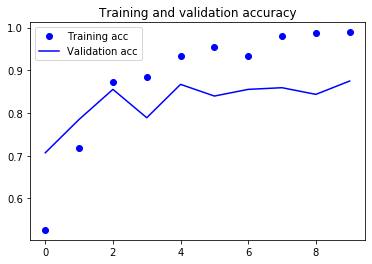

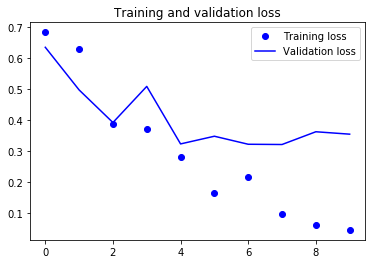

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
model.evaluate(x_test, y_test)

320/320 [==============================] - 0s 2ms/step


[2.289499342441559, 0.4937500059604645]